In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('weatherHistory_norm.csv')
df.head(2)

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary,precip-type-rain,precipt-type-snow,unknow
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,0.221130,0.699164,0.983,0.970135,Partly cloudy throughout the day.,1,0,0
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,0.223399,0.721448,0.983,0.970613,Partly cloudy throughout the day.,1,0,0


In [6]:
df['Temperature (C)'].min()

-21.822222222222226

In [7]:
df['Temperature (C)'].max()

39.90555555555555

In [9]:
amp = df['Temperature (C)'].max() - df['Temperature (C)'].min()
amp

61.727777777777774

<AxesSubplot:>

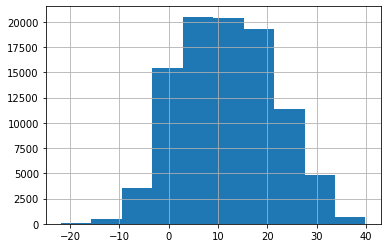

In [11]:
 df['Temperature (C)'].hist()

In [12]:
 df['Temperature (C)'].mode()

0    7.222222
dtype: float64

In [13]:
 df['Temperature (C)'].mean()

11.932678437511882

In [14]:
 df['Temperature (C)'].median()

12.0

<AxesSubplot:>

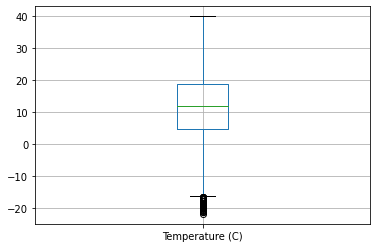

In [15]:
 df[['Temperature (C)']].boxplot()

In [16]:
## Erros

In [20]:
df_sample = df[:10]
x = df_sample['Temperature (C)']

In [21]:
x

0     9.472222
1     9.355556
2     9.377778
3     8.288889
4     8.755556
5     9.222222
6     7.733333
7     8.772222
8    10.822222
9    13.772222
Name: Temperature (C), dtype: float64

In [19]:
df_sample['Temperature (C)'].mean()

9.557222222222222

In [24]:
y = np.full(len(x), df_sample['Temperature (C)'].mean())

In [25]:
y

array([9.55722222, 9.55722222, 9.55722222, 9.55722222, 9.55722222,
       9.55722222, 9.55722222, 9.55722222, 9.55722222, 9.55722222])

In [26]:
e = y - x
e

0    0.085000
1    0.201667
2    0.179444
3    1.268333
4    0.801667
5    0.335000
6    1.823889
7    0.785000
8   -1.265000
9   -4.215000
Name: Temperature (C), dtype: float64

In [28]:
from matplotlib import pyplot as plt

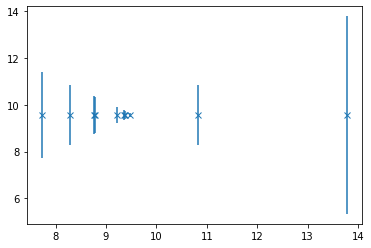

In [31]:
plt.errorbar(x, y, e, linestyle="None", marker="x")
plt.show()

In [35]:
round(sum(e), 4)

0.0

In [36]:
e2 = np.square(e)
e2

0     0.007225
1     0.040669
2     0.032200
3     1.608669
4     0.642669
5     0.112225
6     3.326571
7     0.616225
8     1.600225
9    17.766225
Name: Temperature (C), dtype: float64

In [38]:
MSE = sum(e2)

In [41]:
MSE

25.752904320987646

In [39]:
RMSE = np.sqrt(MSE)

In [40]:
RMSE

5.074731945727542

### Regressão Linear

In [42]:
from sklearn.linear_model import LinearRegression

In [43]:
lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [44]:
X = df[['Humidity']]
Y = df['Temperature (C)']

In [45]:
from sklearn.model_selection import train_test_split

In [47]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

In [48]:
lm.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [49]:
lm.coef_

array([-30.94895137])

In [50]:
lm.intercept_

34.695089905271566

In [ ]:
# temperatura = 34.695089905271566 - -30.94895137 * Humidity 

In [52]:
y_pred = lm.predict(X_test)

In [53]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [56]:
print('R2:', r2_score(Y_test, y_pred))
print('MAE: ', mean_absolute_error(Y_test, y_pred))
print('MSE:', mean_squared_error(Y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(Y_test, y_pred)))

R2: 0.39512290044853393
MAE:  6.063652550192406
MSE: 55.368656325106386
RMSE: 7.44101178100844


### Regressão Linear Multipla

In [103]:
# X = df[['Humidity']]
Z = df[['Humidity', 'Pressure (millibars)', 'precip-type-rain', 'precipt-type-snow']]

In [104]:
X_train, X_test, Y_train, Y_test = train_test_split(Z, Y, test_size=0.3)

In [105]:
lm.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [106]:
lm.coef_

array([-25.85411157,   0.08604366,   2.73911189, -10.68907539])

In [107]:
y_pred = lm.predict(X_test)

In [108]:
print('R2:', r2_score(Y_test, y_pred))
print('MAE: ', mean_absolute_error(Y_test, y_pred))
print('MSE:', mean_squared_error(Y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(Y_test, y_pred)))

R2: 0.5822032414712719
MAE:  5.101873383107261
MSE: 38.08847189120521
RMSE: 6.171585848969875


## Polinomial

In [109]:
x = df['Humidity']
y = df['Temperature (C)']

In [110]:
f = np.polyfit(x, y, 2)
p = np.poly1d(f)
print(p)

       2
13.03 x - 48.22 x + 39.83


In [111]:
from sklearn.preprocessing import PolynomialFeatures

In [112]:
pr = PolynomialFeatures(degree=2)
pr

PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)

In [114]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

In [116]:
x_train_pr = pr.fit_transform(X_train)
x_test_pr = pr.fit_transform(X_test)

In [117]:
plr = LinearRegression()
plr

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [118]:
plr.fit(x_train_pr, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [120]:
plr.score(x_train_pr, Y_train)

0.40632691378653385

In [121]:
yhat = plr.predict(x_test_pr)

In [122]:
print('R2:', r2_score(Y_test, yhat))
print('MAE: ', mean_absolute_error(Y_test, yhat))
print('MSE:', mean_squared_error(Y_test, yhat))
print('RMSE:', np.sqrt(mean_squared_error(Y_test, yhat)))

R2: 0.39352825910178213
MAE:  6.0429218524400214
MSE: 55.08720383926478
RMSE: 7.422075440149122


## Pipeline

In [123]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [139]:
Input = [('scale', StandardScaler()), ('polynomial', PolynomialFeatures(degree=5)),('model',LinearRegression())]

In [140]:
pipe = Pipeline(Input)
pipe

Pipeline(memory=None,
     steps=[('scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('polynomial', PolynomialFeatures(degree=5, include_bias=True, interaction_only=False)), ('model', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False))])

In [141]:
pipe.fit(X_train, Y_train)

Pipeline(memory=None,
     steps=[('scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('polynomial', PolynomialFeatures(degree=5, include_bias=True, interaction_only=False)), ('model', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False))])

In [142]:
ypipe = pipe.predict(X_test)

In [143]:
print('R2:', r2_score(Y_test, ypipe))
print('MAE: ', mean_absolute_error(Y_test, ypipe))
print('MSE:', mean_squared_error(Y_test, ypipe))
print('RMSE:', np.sqrt(mean_squared_error(Y_test, ypipe)))

R2: 0.4052560467545505
MAE:  6.022693995862825
MSE: 54.02194228551979
RMSE: 7.349962060141521
